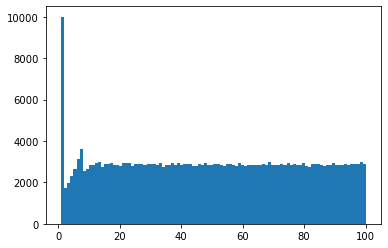

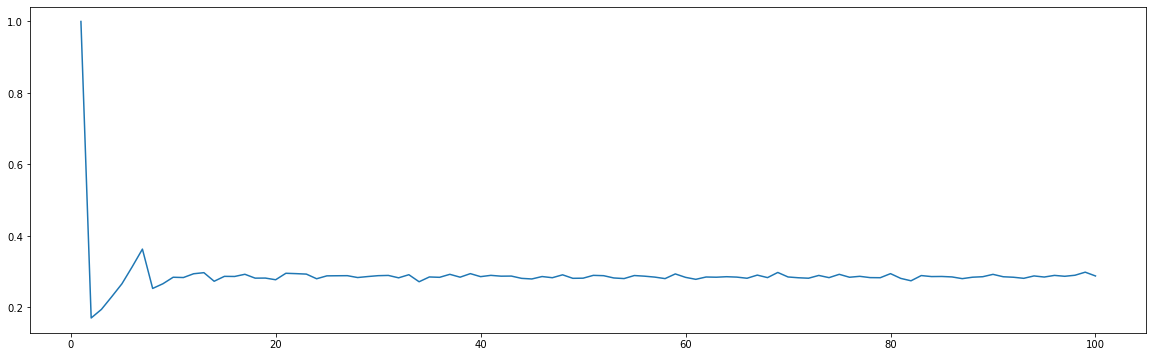

0.28630500000000003


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def simulate(n): #function simulates a path
    total = np.array([], dtype ='float') #stores all numbers within all paths
    for i in range(n):
        x = 1.0 #start at S_1
        path = np.array([1.0])
        for j in range(100): #100 throws of the dice should be enough to find the limit 
            d = random.randint(1,6) #dice roll
            x += float(d) #updates position
            path = np.append(path, float(x)) #adds position to path
        total = np.concatenate((total, path)) #updates total
    return total.reshape(-1)

arr = simulate(10000)
data = [x for x in arr if x <= 100] #only interested in S_1 to S_100


hist, bins, _  = plt.hist(data, bins=100)

x = np.arange(1,101)

plt.figure(figsize=(20, 6))
plt.plot(x, hist/10000) # plots probability against n
plt.show()
print(np.mean(hist[60:])/10000) #calculates limit

┌───────────────────────┬───────────────────┬─────────────────────┬─────────────┐
│   N (# sides on dice) │   Calulated Limit │   Conjectured Limit │       Error │
├───────────────────────┼───────────────────┼─────────────────────┼─────────────┤
│                     2 │        0.66690250 │          0.66666667 │  0.00023583 │
├───────────────────────┼───────────────────┼─────────────────────┼─────────────┤
│                     3 │        0.49924500 │          0.50000000 │ -0.00075500 │
├───────────────────────┼───────────────────┼─────────────────────┼─────────────┤
│                     4 │        0.39973500 │          0.40000000 │ -0.00026500 │
├───────────────────────┼───────────────────┼─────────────────────┼─────────────┤
│                     5 │        0.33297000 │          0.33333333 │ -0.00036333 │
├───────────────────────┼───────────────────┼─────────────────────┼─────────────┤
│                     6 │        0.28538750 │          0.28571429 │ -0.00032679 │
├───────────────

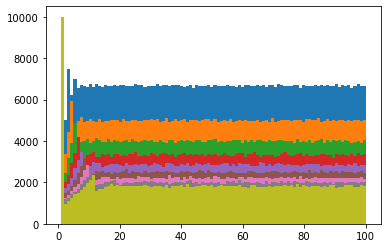

In [2]:
def simulate(n, N): #n is the number of simulations, N is the number of sides on dice
    total = np.array([], dtype ='float') #stores all numbers within all paths
    for i in range(n):
        x = 1.0 #start at S_1
        path = np.array([1.0])
        for j in range(100): #100 throws of the dice should be enough to find the limit 
            d = random.randint(1,N) #dice roll
            x += float(d) #updates position
            path = np.append(path, float(x)) #adds position to path
        total = np.concatenate((total, path)) #updates total
    total = total.reshape(-1)
    data = [x for x in total if x <= 100]
    hist, bins, _  = plt.hist(data, bins=100)
    return (np.mean(hist[60:])/n) #this approximately calculates limit of P_n for the N sided dice

limit = []
error = []

table = []

for i in range(2, 11):
    L = simulate(10000, i) #calculate the error for N sided dice from 2 to 10 using 10,000 simulations for each dice
    limit.append(L)
    
    E = L - 2/(i+1) #calculate error between calculated value and conjectured value
    error.append(E)
    
    table.append([i, L, 2/(i+1), E])

headers = ['N (# sides on dice)', 'Calulated Limit', 'Conjectured Limit', 'Error']

    
print(tabulate(table, headers, tablefmt="simple_grid", floatfmt=".8f"))
